C:\Users\timBo\miniconda3\envs\tf\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


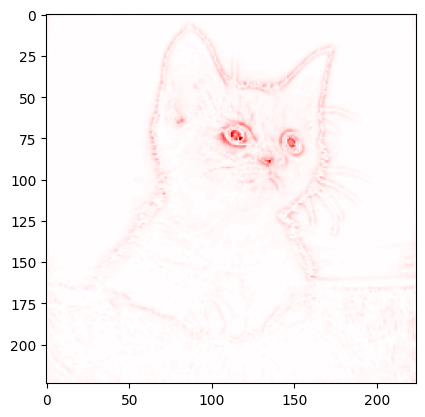

In [1]:
import tensorflow as tf
import keras.applications.vgg16 as vgg16
tf.compat.v1.disable_eager_execution()
import cv2
import numpy as np
import innvestigate
import matplotlib.pyplot as plt

# Load the image
image_path = "cat_image.jpg"
original_image = cv2.imread(image_path)
# Resize the image to (224, 224, 3)
resized_image = cv2.resize(original_image, (224, 224))
image = resized_image
# Get model
model, preprocess = vgg16.VGG16(), vgg16.preprocess_input
# Strip softmax layer
model = innvestigate.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("deep_taylor", model)

# Add batch axis and preprocess
x = preprocess(image[None])
# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))
# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))